In [ ]:
import mysql.connector as mysql
import database as db
import csv, sys
import image_generator
import feature_extractor
import numpy as np
import os

In [ ]:
myDB = db.connect_db("inference")
list_model = ["mobilenet_v1", "inception_v4", "resnet_v1_152"]

In [ ]:
num_of_images = 100
image_generator.main()
imgGen = image_generator.ImageGenerator('images/val/images', 'images/val/val.txt', 'images/val/synset_words.txt')
label_list = imgGen.get_label_list() 

In [ ]:
img_nums = []
for i in range(1, num_of_images):                 # the range of images can be selected here
    img_nums.append(i)

img_paths = []
filenames = []
for i in range(len(img_nums)):
    img_path, _ = imgGen.get_image_data(img_nums[i])
    img_paths.append(img_path)                                             # we obtain the image paths and filenames
for i in range(len(img_nums)):
    img_name = imgGen.get_image_filename(img_nums[i])
    filenames.append(img_name)

In [ ]:
features_list = []                            # this list hold features of all 20k images

for i in range(len(img_paths)):
    filename = img_paths[i]
    features_list.append(feature_extractor.extract_features(filename))
print(len(features_list))

In [ ]:
import sklearn.preprocessing as preprocessing

features_list = preprocessing.normalize(features_list)
features_list = preprocessing.scale(features_list)

In [ ]:
for x in range(20):
    print(features_list[x])

In [1]:
from __future__ import division
#import sys
import os
import csv
from tqdm import tqdm
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
# Import datasets, classifiers and performance metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from math import ceil
import util
from threading import Thread
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import NearMiss
#-------------------------------
# from sklearn.gaussian_process import GaussianProcessRegressor
# from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.naive_bayes import GaussianNB

In [2]:
import premodel
pm = premodel.Premodel('Top-1')

In [30]:
amount_images = 1000 #changes the number of input images
list_premodels = ([('log_reg', 'log_reg', 'log_reg')])
data, first_level_data, second_level_data, third_level_data = pm.cv_training_data(amount_images)
feature_list = ['n_of_keypoints', 'avg_perc_brightness', 'contrast', 'area_by_perim', 'aspect_ratio', 'edge_length1', 'hue1']

<font size="5">**Preparing the data and building classifiers**</font>
<br /><br />
<font size="3">This part of the code is based on the CV_fold_worker() function from authors' code. Here we obtain the features data from csv file, transform it and pass it to classifiers. Then, feature importance in both classifiers is evaluated for each chunk using built-in functions from sklearn library.      
</font>

Logistic Regression, chunk: range(0, 100)
Feature: 0, Score: 0.16015
Feature: 1, Score: -0.71066
Feature: 2, Score: -2.19554
Feature: 3, Score: -2.72554
Feature: 4, Score: -1.15281
Feature: 5, Score: -2.44769
Feature: 6, Score: -1.90846


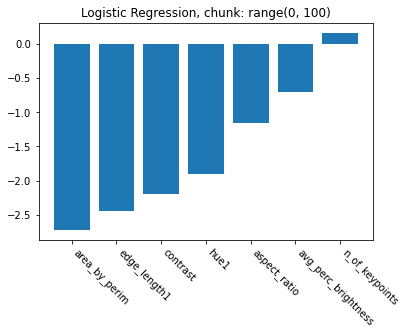

Decision Tree, chunk: range(0, 100)
Feature: 0, Score: 0.06085
Feature: 1, Score: 0.07758
Feature: 2, Score: 0.11314
Feature: 3, Score: 0.35801
Feature: 4, Score: 0.06783
Feature: 5, Score: 0.19021
Feature: 6, Score: 0.13240


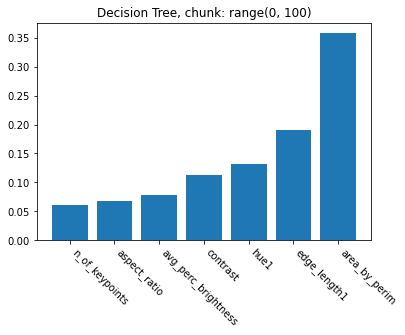

Logistic Regression, chunk: range(100, 200)
Feature: 0, Score: 0.16460
Feature: 1, Score: -0.76074
Feature: 2, Score: -2.19364
Feature: 3, Score: -2.86362
Feature: 4, Score: -1.43930
Feature: 5, Score: -2.30000
Feature: 6, Score: -1.77187


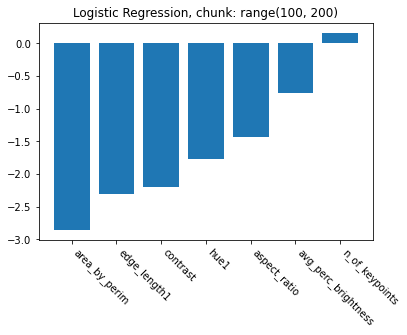

Decision Tree, chunk: range(100, 200)
Feature: 0, Score: 0.09419
Feature: 1, Score: 0.05285
Feature: 2, Score: 0.11582
Feature: 3, Score: 0.42869
Feature: 4, Score: 0.07819
Feature: 5, Score: 0.13147
Feature: 6, Score: 0.09879


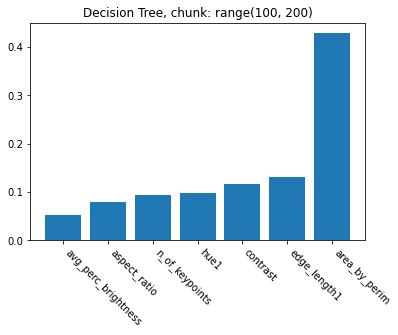

Logistic Regression, chunk: range(200, 300)
Feature: 0, Score: 0.15072
Feature: 1, Score: -0.68495
Feature: 2, Score: -2.20346
Feature: 3, Score: -2.89365
Feature: 4, Score: -1.40758
Feature: 5, Score: -2.47750
Feature: 6, Score: -2.10590


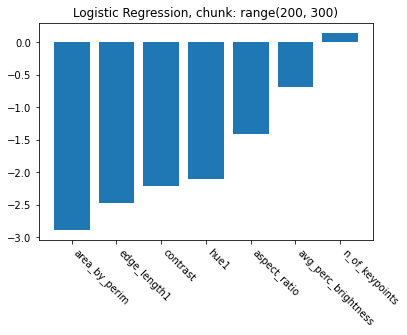

Decision Tree, chunk: range(200, 300)
Feature: 0, Score: 0.07935
Feature: 1, Score: 0.05930
Feature: 2, Score: 0.13477
Feature: 3, Score: 0.37236
Feature: 4, Score: 0.06973
Feature: 5, Score: 0.16522
Feature: 6, Score: 0.11927


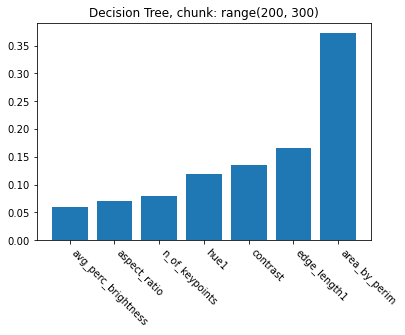

Logistic Regression, chunk: range(300, 400)
Feature: 0, Score: 0.16538
Feature: 1, Score: -0.91972
Feature: 2, Score: -2.15584
Feature: 3, Score: -2.79331
Feature: 4, Score: -1.32908
Feature: 5, Score: -2.35663
Feature: 6, Score: -1.71076


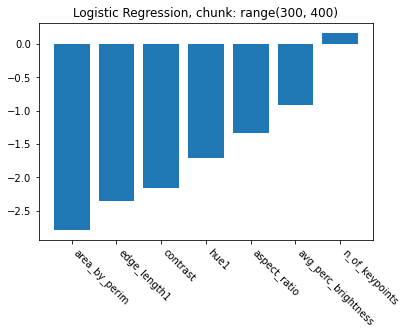

Decision Tree, chunk: range(300, 400)
Feature: 0, Score: 0.05588
Feature: 1, Score: 0.06243
Feature: 2, Score: 0.15423
Feature: 3, Score: 0.43177
Feature: 4, Score: 0.05136
Feature: 5, Score: 0.14218
Feature: 6, Score: 0.10215


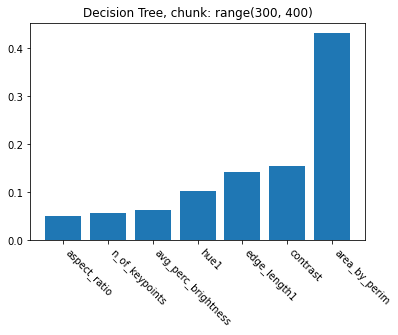

Logistic Regression, chunk: range(400, 500)
Feature: 0, Score: 0.16425
Feature: 1, Score: -0.83151
Feature: 2, Score: -2.55159
Feature: 3, Score: -2.65764
Feature: 4, Score: -1.56999
Feature: 5, Score: -2.46338
Feature: 6, Score: -1.79049


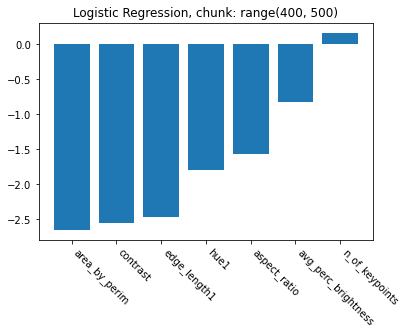

Decision Tree, chunk: range(400, 500)
Feature: 0, Score: 0.06356
Feature: 1, Score: 0.07248
Feature: 2, Score: 0.10998
Feature: 3, Score: 0.38490
Feature: 4, Score: 0.07087
Feature: 5, Score: 0.18445
Feature: 6, Score: 0.11375


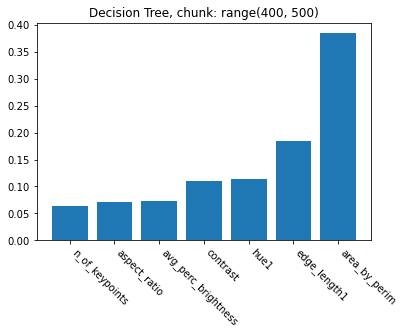

Logistic Regression, chunk: range(500, 600)
Feature: 0, Score: 0.16205
Feature: 1, Score: -0.88933
Feature: 2, Score: -2.35533
Feature: 3, Score: -2.54392
Feature: 4, Score: -1.48840
Feature: 5, Score: -2.38209
Feature: 6, Score: -1.54940


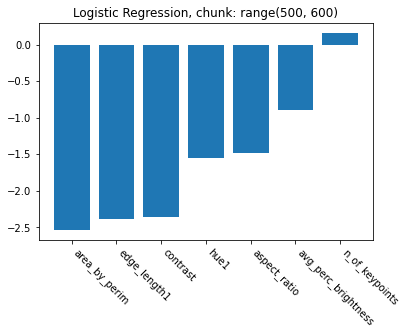

Decision Tree, chunk: range(500, 600)
Feature: 0, Score: 0.05620
Feature: 1, Score: 0.03975
Feature: 2, Score: 0.15567
Feature: 3, Score: 0.36811
Feature: 4, Score: 0.09650
Feature: 5, Score: 0.14871
Feature: 6, Score: 0.13505


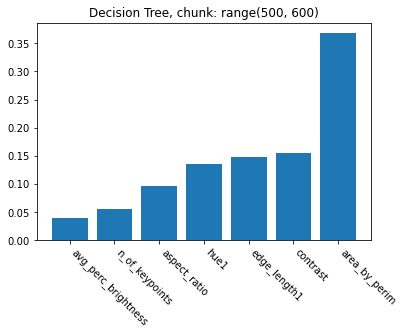

Logistic Regression, chunk: range(600, 700)
Feature: 0, Score: 0.17058
Feature: 1, Score: -1.13522
Feature: 2, Score: -2.26382
Feature: 3, Score: -2.65947
Feature: 4, Score: -1.27245
Feature: 5, Score: -2.14942
Feature: 6, Score: -1.99572


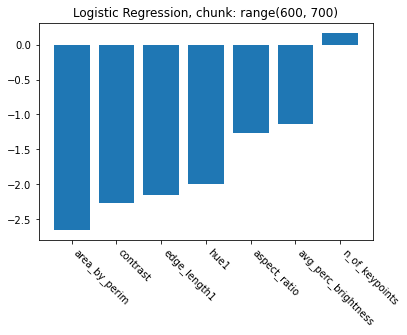

Decision Tree, chunk: range(600, 700)
Feature: 0, Score: 0.40207
Feature: 1, Score: 0.07513
Feature: 2, Score: 0.08792
Feature: 3, Score: 0.08567
Feature: 4, Score: 0.08347
Feature: 5, Score: 0.14665
Feature: 6, Score: 0.11909


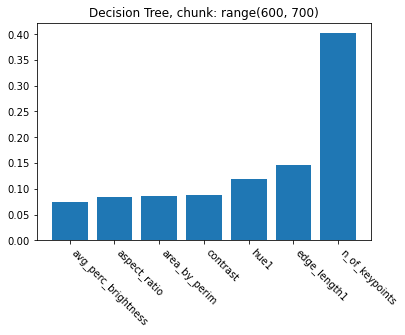

Logistic Regression, chunk: range(700, 800)
Feature: 0, Score: 0.16825
Feature: 1, Score: -0.83140
Feature: 2, Score: -2.21718
Feature: 3, Score: -2.85698
Feature: 4, Score: -1.39243
Feature: 5, Score: -2.29871
Feature: 6, Score: -1.86403


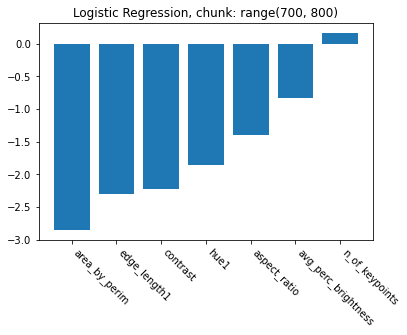

Decision Tree, chunk: range(700, 800)
Feature: 0, Score: 0.06321
Feature: 1, Score: 0.03967
Feature: 2, Score: 0.07396
Feature: 3, Score: 0.45452
Feature: 4, Score: 0.10871
Feature: 5, Score: 0.18348
Feature: 6, Score: 0.07645


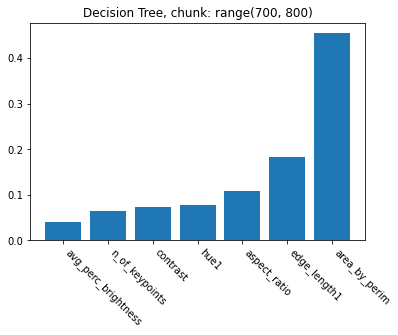

Logistic Regression, chunk: range(800, 900)
Feature: 0, Score: 0.16958
Feature: 1, Score: -0.88418
Feature: 2, Score: -2.41503
Feature: 3, Score: -2.87276
Feature: 4, Score: -1.46142
Feature: 5, Score: -2.04664
Feature: 6, Score: -1.64068


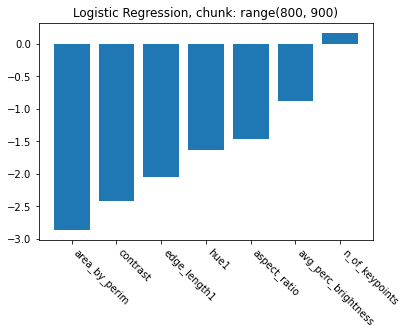

Decision Tree, chunk: range(800, 900)
Feature: 0, Score: 0.07274
Feature: 1, Score: 0.06680
Feature: 2, Score: 0.13999
Feature: 3, Score: 0.35703
Feature: 4, Score: 0.12308
Feature: 5, Score: 0.12788
Feature: 6, Score: 0.11248


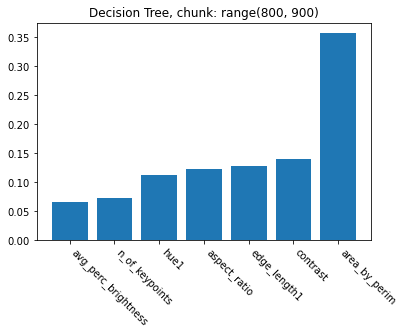

Logistic Regression, chunk: range(900, 1000)
Feature: 0, Score: 0.16218
Feature: 1, Score: -0.55426
Feature: 2, Score: -2.31615
Feature: 3, Score: -2.59587
Feature: 4, Score: -1.53393
Feature: 5, Score: -2.45511
Feature: 6, Score: -2.02889


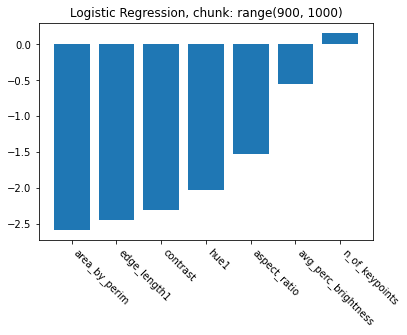

Decision Tree, chunk: range(900, 1000)
Feature: 0, Score: 0.06527
Feature: 1, Score: 0.08595
Feature: 2, Score: 0.12949
Feature: 3, Score: 0.41425
Feature: 4, Score: 0.05102
Feature: 5, Score: 0.12981
Feature: 6, Score: 0.12421


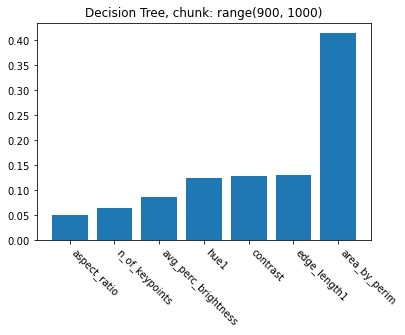

In [62]:
import matplotlib.pyplot as plt
from sklearn import tree
for counter,(first_level_machine, second_level_machine, third_level_machine) in enumerate(list_premodels):
            # Split training data in k-fold chunks
            # Minimum needs to be 2
            k_fold = 10
            worker_threads = list()
            chunk_size = int(ceil(len(data) / float(k_fold)))    
            # Create a new thread for each fold
            for i, (test_idx, train_idx) in enumerate(util.chunkise(range(len(data)), chunk_size)):
                return_wrapper = list()
                X_train, _ = util.list_split(data, train_idx, [0])
                X_train_first_level = X_train
                X_train_second_level = X_train
                X_train_third_level = X_train


                Y_train, _ = util.list_split(data, test_idx, [0])
                Y_test_first_level, _ = util.list_split(first_level_data, test_idx, [0])
                Y_test_second_level, _ = util.list_split(second_level_data, test_idx, [0])
                Y_test_third_level, _ = util.list_split(third_level_data, test_idx, [0])

                X_test_first_level, _ = util.list_split(first_level_data, train_idx, [0])
                X_test_second_level, _ = util.list_split(second_level_data, train_idx, [0])
                X_test_third_level, _ = util.list_split(third_level_data, train_idx, [0])

                X_val_first_level = [X_test_first_level[i][1] for i in range(0,len(X_test_first_level))]
                Y_val_first_level = [Y_test_first_level[i][1] for i in range(0,len(Y_test_first_level))]

                X_val_second_level = [X_test_second_level[i][1] for i in range(0,len(X_test_second_level))]
                Y_val_second_level = [Y_test_second_level[i][1] for i in range(0,len(Y_test_second_level))]

                X_val_third_level = [X_test_third_level[i][1] for i in range(0,len(X_test_third_level))]
                Y_val_third_level = [Y_test_third_level[i][1] for i in range(0,len(Y_test_third_level))]

                for i in range(len(X_train_first_level)):
                    for j in range(len(X_train_first_level[i])):
                        X_train_first_level[i][j] = float(X_train_first_level[i][j])
                for i in range(len(X_val_first_level)):
                    X_val_first_level[i] = int(X_val_first_level[i])


                for i in range(len(X_train_second_level)):
                    for j in range(len(X_train_second_level[i])):
                        X_train_second_level[i][j] = float(X_train_second_level[i][j])
                for i in range(len(X_val_second_level)):
                    X_val_second_level[i] = int(X_val_second_level[i])



                for i in range(len(X_train_third_level)):
                    for j in range(len(X_train_third_level[i])):
                        X_train_third_level[i][j] = float(X_train_third_level[i][j])
                for i in range(len(X_val_third_level)):
                    X_val_third_level[i] = int(X_val_third_level[i])


                X_train_first_level = np.array(X_train_first_level)
                X_train_second_level = np.array(X_train_second_level)
                X_train_third_level = np.array(X_train_third_level)
                X_train_first_level = X_train_first_level.astype('float64')
                X_train_second_level = X_train_second_level.astype('float64')
                X_train_third_level = X_train_third_level.astype('float64')
                Y_train = np.array(Y_train)


                X_val_first_level = np.array(X_val_first_level)
                X_val_second_level = np.array(X_val_second_level)
                X_val_third_level = np.array(X_val_third_level)
                X_val_first_level = X_val_first_level.astype('int')
                X_val_second_level = X_val_second_level.astype('int')
                X_val_third_level = X_val_third_level.astype('int')



                #oversample = SMOTE()
                #X_train_first_level, X_val_first_level = oversample.fit_resample(X_train_first_level, X_val_first_level)


                #undersample = CondensedNearestNeighbour(n_neighbors=1)
                #undersample = TomekLinks()
                #undersample = EditedNearestNeighbours(n_neighbors=3)
                #undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
                undersample = NearMiss(version=1, n_neighbors=3)
            # transform the dataset
                X_train_first_level, X_val_first_level = undersample.fit_resample(X_train_first_level, X_val_first_level)

                X_train_second_level, X_val_second_level = undersample.fit_resample(X_train_second_level, X_val_second_level)

                X_train_third_level, X_val_third_level = undersample.fit_resample(X_train_third_level, X_val_third_level)



                list_predictions = []
                Y_train_second_level = []
                Y_train_second_level_position = []
                Y_train_third_level = []
                Y_train_third_level_position = []
                log_reg = LogisticRegression()                           #Logistic Regression feature importance
                #log_reg = LogisticRegression(class_weight = 'balanced')
                log_reg.fit(X_train_first_level, X_val_first_level)
                # Prediction
                predicted = log_reg.predict(Y_train)
                predicted = predicted.astype(int)
                importance = log_reg.coef_[0]
                d = dict(zip(feature_list, importance))
                d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
                # summarize feature importance
                print("Logistic Regression, chunk: {}".format(test_idx))
                for i,v in enumerate(importance):
                    print('Feature: %0d, Score: %.5f' % (i,v))
                # plot feature importance
                plt.title("Logistic Regression, chunk: {}".format(test_idx))
                plt.bar(d_sorted.keys(), d_sorted.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()
                
                
                regr_2 = DecisionTreeRegressor(max_depth=2)    #DT feature importance
                regr_5 = DecisionTreeRegressor(max_depth=5)
                regr_8 = DecisionTreeRegressor(max_depth=8)
                regr_12 = DecisionTreeRegressor(max_depth=12)
                regr_16 = DecisionTreeRegressor(max_depth=16)

                # Fit tree
                regr_2.fit(X_train_first_level, X_val_first_level)
                regr_5.fit(X_train_first_level, X_val_first_level)
                regr_8.fit(X_train_first_level, X_val_first_level)
                regr_12.fit(X_train_first_level, X_val_first_level)
                regr_16.fit(X_train_first_level, X_val_first_level)

                # Predict
                predicted_level_2 = regr_2.predict(Y_train)
                predicted_level_5 = regr_5.predict(Y_train)
                predicted_level_8 = regr_8.predict(Y_train)
                predicted_level_12 = regr_12.predict(Y_train)
                predicted_level_16 = regr_16.predict(Y_train)
                importance = regr_16.feature_importances_
                d = dict(zip(feature_list, importance))
                d_sorted = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
                # Summarize feature importance
                print("Decision Tree, chunk: {}".format(test_idx))
                for i,v in enumerate(importance):
                    print('Feature: %0d, Score: %.5f' % (i,v))
                # Plot feature importance
                #importance.sort()
                plt.title("Decision Tree, chunk: {}".format(test_idx))
                plt.bar(d_sorted.keys(), d_sorted.values())
                plt.xticks(rotation=-45, ha='left')
                plt.show()

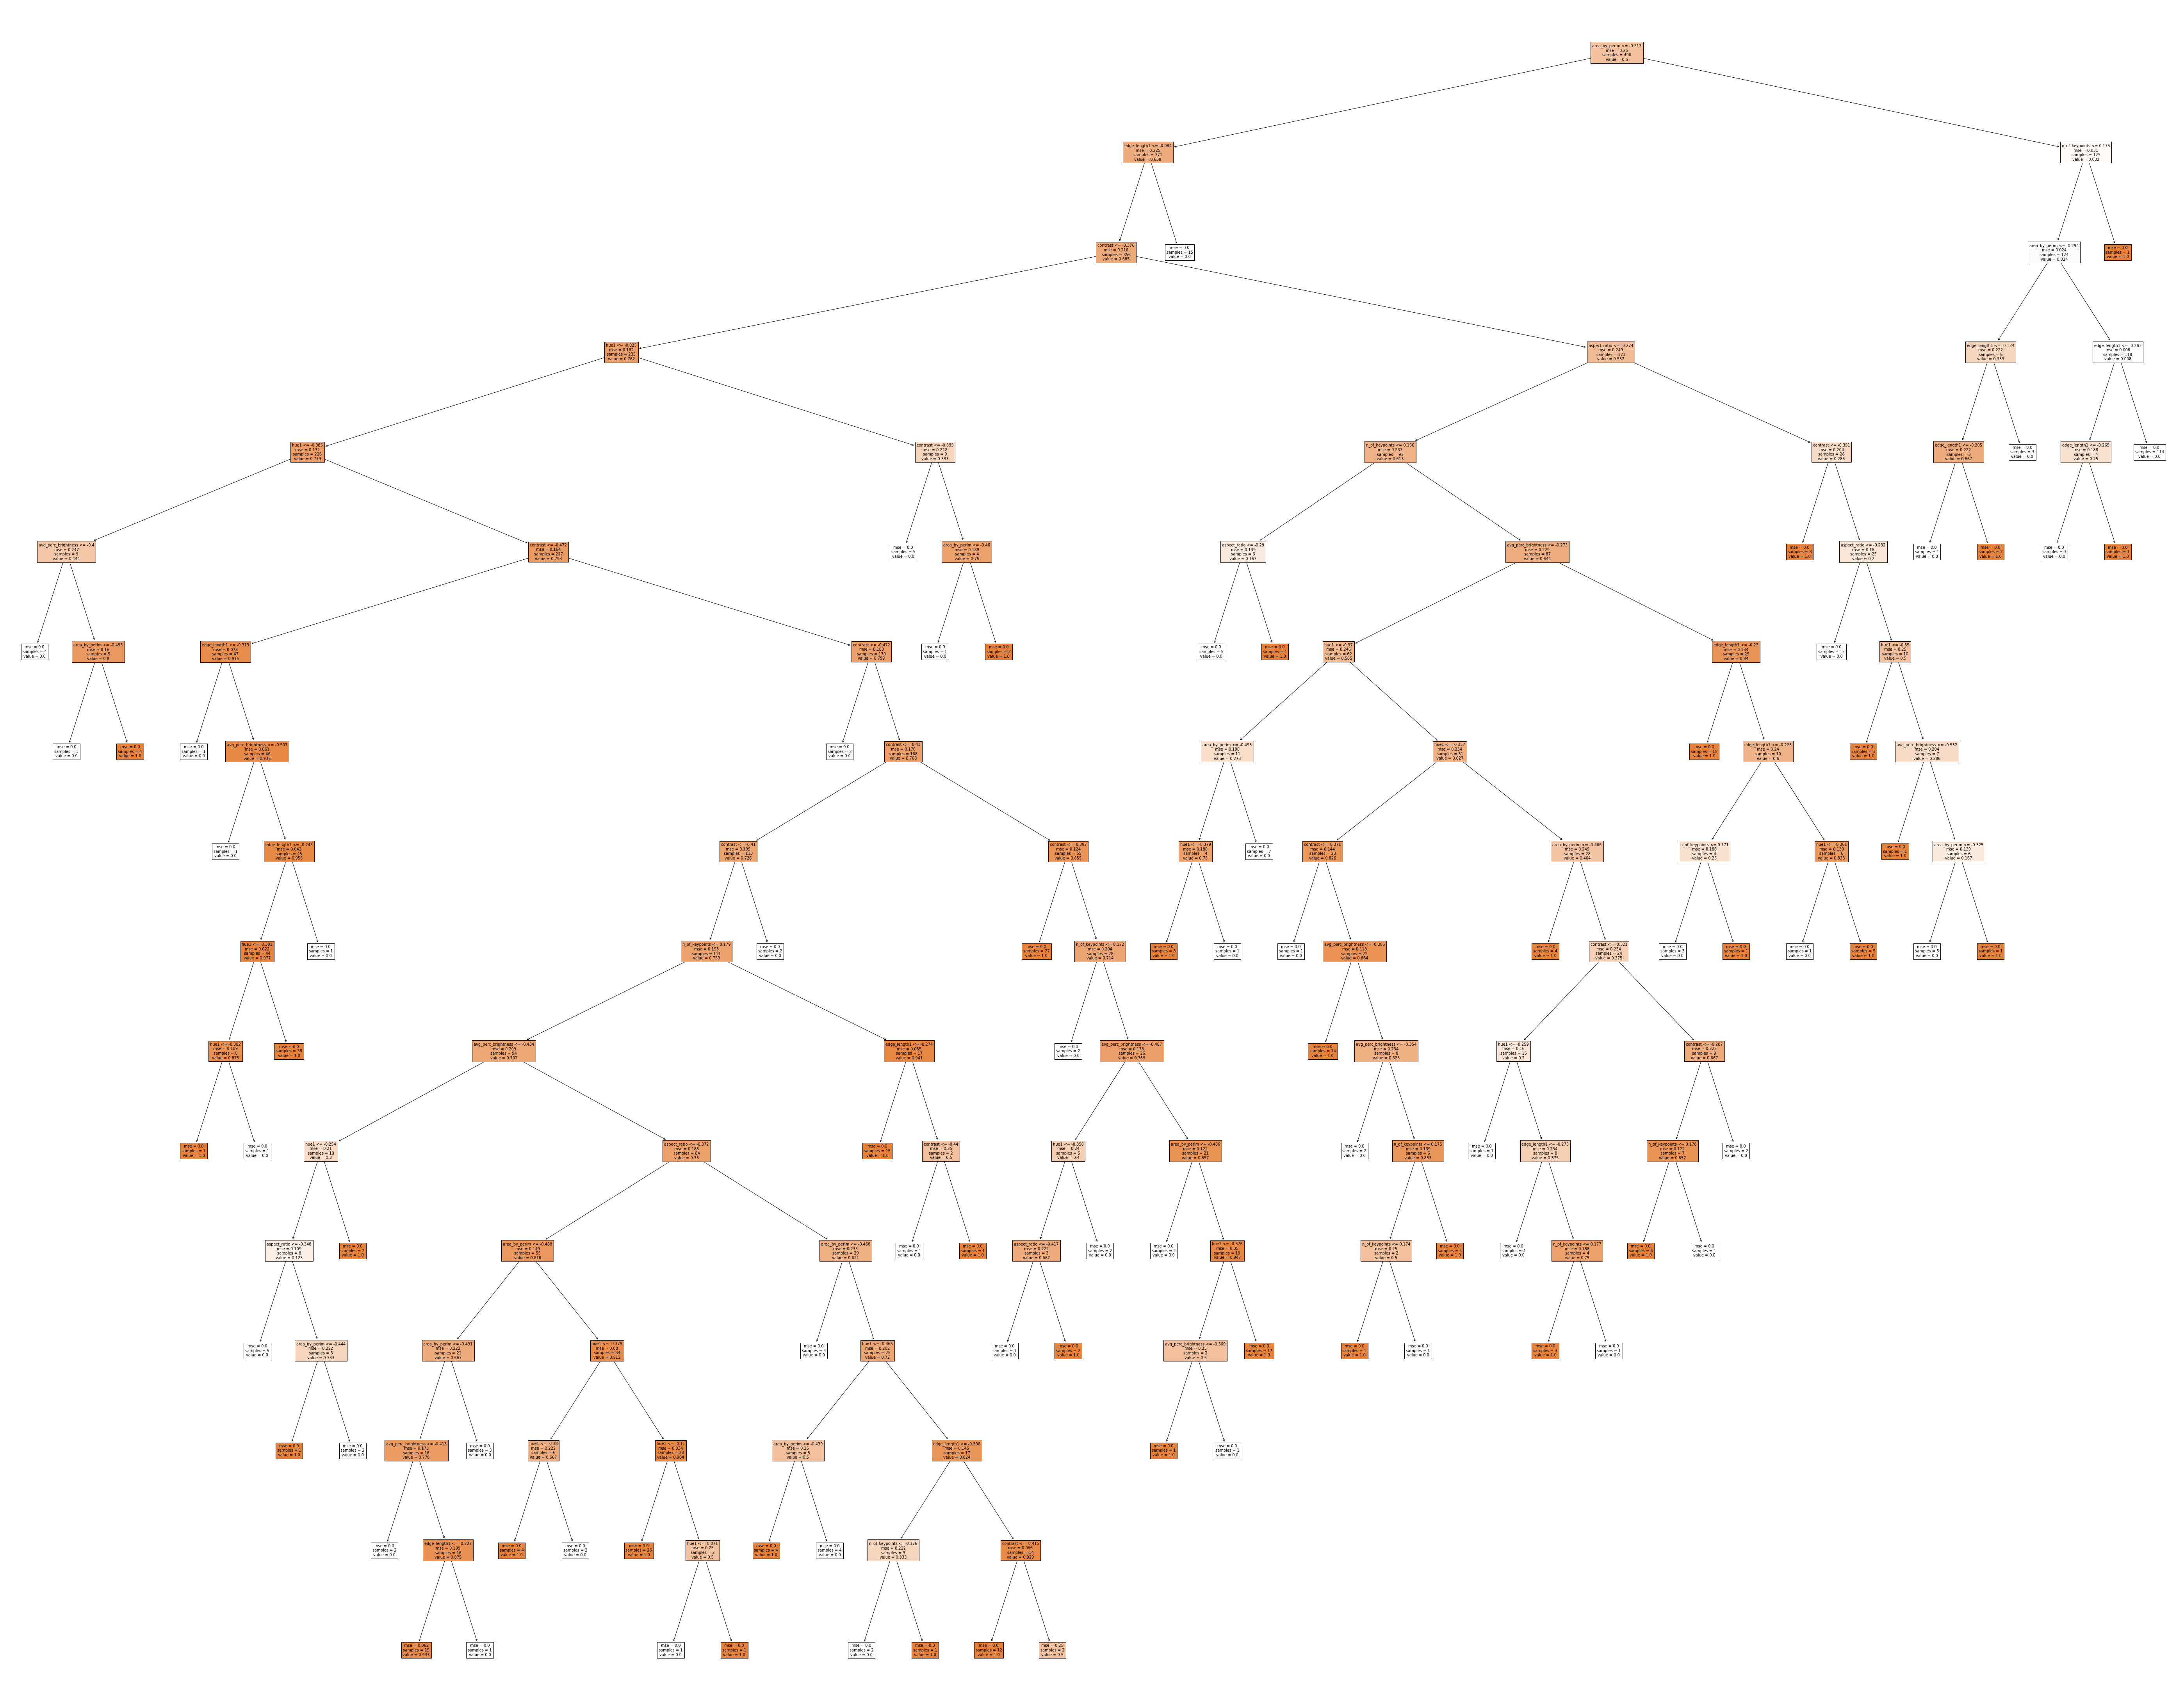

In [63]:
fig = plt.figure(figsize=(100,80))
# _ = tree.plot_tree(regr_2, feature_names=feature_list, filled=True)
# _ = tree.plot_tree(regr_5, feature_names=feature_list, filled=True)
# _ = tree.plot_tree(regr_8, feature_names=feature_list, filled=True)
# _ = tree.plot_tree(regr12, feature_names=feature_list, filled=True)
_ = tree.plot_tree(regr_16, feature_names=feature_list, filled=True)
#fig.savefig("decistion_tree.png") #if you want to download the visualization of a tree